In [1]:
# Giuseppe Toritto
# 05/07/23
# CIS-2532
### AUTHOR: josephlee94 ###


import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6934 - accuracy: 0.4932 - val_loss: 0.6915 - val_accuracy: 0.5982
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.6194 - val_loss: 0.6867 - val_accuracy: 0.7169
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.7045 - val_loss: 0.6821 - val_accuracy: 0.7489
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.7368 - val_loss: 0.6777 - val_accuracy: 0.7763
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.7534 - val_loss: 0.6738 - val_accuracy: 0.7808
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.7613 - val_loss: 0.6701 - val_accuracy: 0.7900
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.7710 - val_loss: 0.6665 - val_accuracy: 0.7854
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3339 - accuracy: 0.8826 - val_loss: 0.3250 - val_accuracy: 0.8767
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8836 - val_loss: 0.3211 - val_accuracy: 0.8767
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8816 - val_loss: 0.3186 - val_accuracy: 0.8767
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8836 - val_loss: 0.3162 - val_accuracy: 0.8767
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8826 - val_loss: 0.3141 - val_accuracy: 0.8767
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8816 - val_loss: 0.3140 - val_accuracy: 0.8813
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8787 - val_loss: 0.3096 - val_accuracy: 0.8721
Epoch 

In [19]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8493


0.8493150472640991

In [20]:
import matplotlib.pyplot as plt

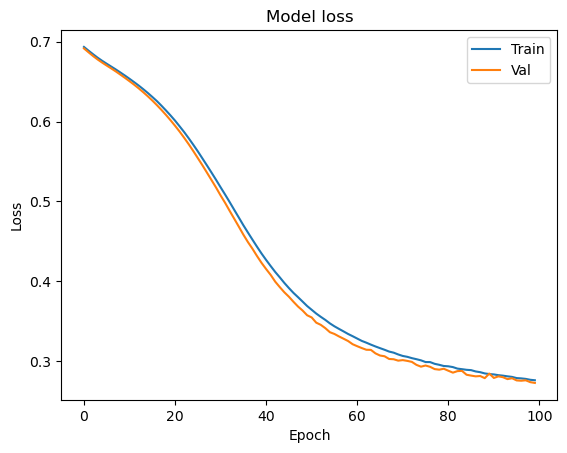

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

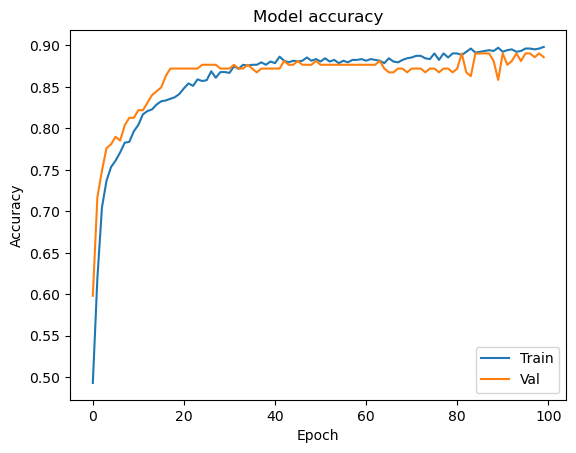

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [23]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 18ms/step - loss: 0.5428 - accuracy: 0.7182 - val_loss: 0.4023 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 0s 12ms/step - loss: 0.3637 - accuracy: 0.8640 - val_loss: 0.3155 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 0s 12ms/step - loss: 0.3170 - accuracy: 0.8777 - val_loss: 0.2835 - val_accuracy: 0.8721
Epoch 4/100
32/32 [==============================] - 0s 12ms/step - loss: 0.2714 - accuracy: 0.8973 - val_loss: 0.2742 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 0s 12ms/step - loss: 0.2725 - accuracy: 0.8914 - val_loss: 0.2591 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 0s 12ms/step - loss: 0.2440 - accuracy: 0.9022 - val_loss: 0.2901 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 0s 12ms/step - loss: 0.2477 - accuracy: 0.8973 - val_loss: 0.2709 - val_accuracy: 0.8950
Epoch 

32/32 [==============================] - 0s 12ms/step - loss: 0.1390 - accuracy: 0.9432 - val_loss: 0.3747 - val_accuracy: 0.8676
Epoch 59/100
32/32 [==============================] - 0s 11ms/step - loss: 0.1377 - accuracy: 0.9374 - val_loss: 0.3850 - val_accuracy: 0.8721
Epoch 60/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1317 - accuracy: 0.9472 - val_loss: 0.4285 - val_accuracy: 0.8721
Epoch 61/100
32/32 [==============================] - 0s 11ms/step - loss: 0.1384 - accuracy: 0.9423 - val_loss: 0.4959 - val_accuracy: 0.8630
Epoch 62/100
32/32 [==============================] - 0s 11ms/step - loss: 0.1429 - accuracy: 0.9403 - val_loss: 0.4308 - val_accuracy: 0.8630
Epoch 63/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1388 - accuracy: 0.9452 - val_loss: 0.5369 - val_accuracy: 0.8539
Epoch 64/100
32/32 [==============================] - 0s 11ms/step - loss: 0.1462 - accuracy: 0.9442 - val_loss: 0.4068 - val_accuracy: 0.8630
Epoch 65/100

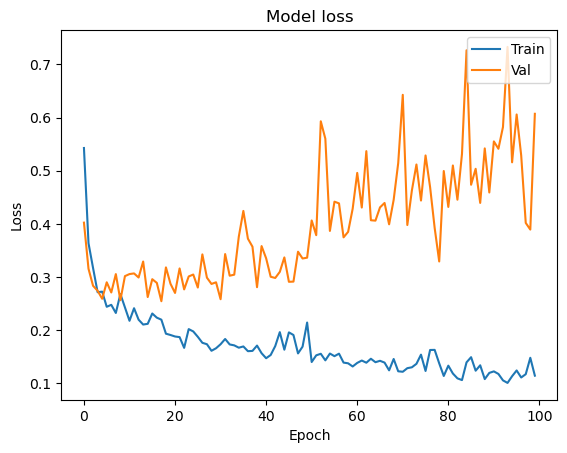

In [24]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

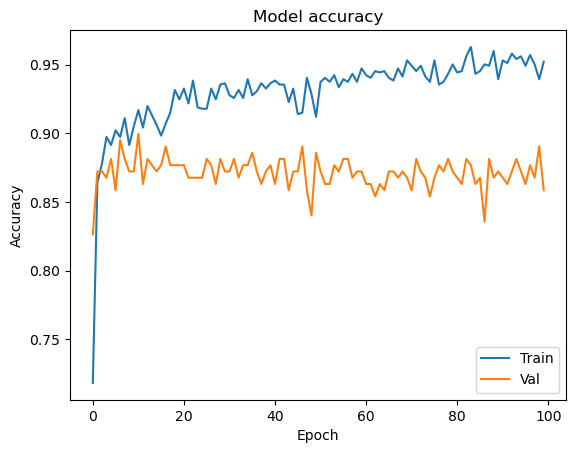

In [25]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [26]:
from keras.layers import Dropout
from keras import regularizers

In [27]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [28]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 21ms/step - loss: 14.2215 - accuracy: 0.7074 - val_loss: 3.8677 - val_accuracy: 0.7626
Epoch 2/100
32/32 [==============================] - 1s 16ms/step - loss: 1.6687 - accuracy: 0.8327 - val_loss: 0.6276 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 0s 15ms/step - loss: 0.5604 - accuracy: 0.8620 - val_loss: 0.5193 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 0s 15ms/step - loss: 0.5128 - accuracy: 0.8659 - val_loss: 0.4927 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 0s 15ms/step - loss: 0.5068 - accuracy: 0.8562 - val_loss: 0.4616 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 0s 15ms/step - loss: 0.4794 - accuracy: 0.8728 - val_loss: 0.5248 - val_accuracy: 0.8356
Epoch 7/100
32/32 [==============================] - 0s 15ms/step - loss: 0.4696 - accuracy: 0.8865 - val_loss: 0.4809 - val_accuracy: 0.8721
Epoch

32/32 [==============================] - 0s 15ms/step - loss: 0.4075 - accuracy: 0.9110 - val_loss: 0.4214 - val_accuracy: 0.8858
Epoch 59/100
32/32 [==============================] - 0s 15ms/step - loss: 0.4337 - accuracy: 0.8777 - val_loss: 0.4302 - val_accuracy: 0.8676
Epoch 60/100
32/32 [==============================] - 0s 14ms/step - loss: 0.4242 - accuracy: 0.8933 - val_loss: 0.4365 - val_accuracy: 0.8858
Epoch 61/100
32/32 [==============================] - 0s 15ms/step - loss: 0.4440 - accuracy: 0.8777 - val_loss: 0.4386 - val_accuracy: 0.8721
Epoch 62/100
32/32 [==============================] - 0s 15ms/step - loss: 0.4344 - accuracy: 0.8924 - val_loss: 0.4221 - val_accuracy: 0.8858
Epoch 63/100
32/32 [==============================] - 0s 15ms/step - loss: 0.4258 - accuracy: 0.8914 - val_loss: 0.4560 - val_accuracy: 0.8767
Epoch 64/100
32/32 [==============================] - 0s 15ms/step - loss: 0.4357 - accuracy: 0.8933 - val_loss: 0.4530 - val_accuracy: 0.8767
Epoch 65/100

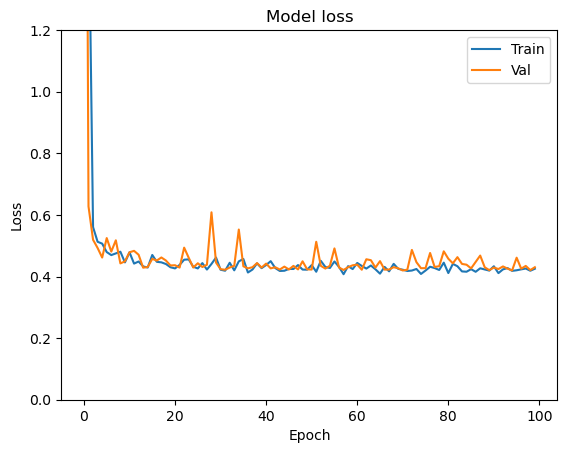

In [29]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

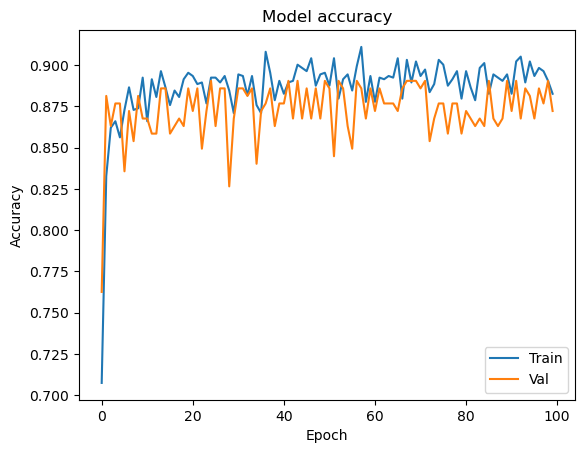

In [30]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()